# SQL in Python - Connecting to and retrieving data from PostgreSQL

Previously, you have learned how to connect to a SQL database by using a SQL client such as DBeaver. Apart from connecting to databases, DBeaver also allows you to run SQL queries against the database, create new tables and populate them with data as well as retrieving the data.

Python also allows executing SQL queries and getting the result into a Python object, for example a Pandas data frame. Instead of exporting a .csv file from DBeaver you can directly get the data you need into Python and continue your work. In addition we can reduce the steps by connecting to the database from Python directly, eliminating the need for a separate SQL client.

After you have the data in Python in the required shape you can export the data into a .csv file. This file is for your own reference, please avoid sending .csv files around - database is the point of reference when it comes to data. 

Having a copy of a .csv file (or another format) can speed up your analysis work. Imagine that the query takes 25 minutes to run. If you made some mistakes in your Python code you might need to go back to the original dataset. Instead of having to rerun the SQL query and having to wait you can read in the .csv file you have previously saved on your hard disk into Python and continue with your analysis work. 

**In this notebook you will see 2 ways to connect to SQL-Databases and export the data to a CSV file**


## Creating a connection to a PostgreSQL database with Python

There are 2 python packages that are the "go-to" when it comes to connecting to SQL-Databases: `psycopg2` and `sqlalchemy` 

### Connecting via psycopg2

In [30]:
import pandas as pd
import psycopg2


In order to create a connection to our PostgreSQL database we need the following information:

- host = the address of the machine the database is hosted on
- port = the virtual gate number through which communication will be allowed
- database = the name of the database
- user = the name of the user
- password = the password of the user

Because we don't want that the database information is published on github we put it into a `.env` file which is added into the `.gitignore`. 
In these kind of files you can store information that is not supposed to be published.
With the `dotenv` package you can read the `.env` files and get the variables.
(We will share the file with you on Slack!)


In [31]:
import os
from dotenv import load_dotenv

load_dotenv()

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

The function from the psycopg2 package to create a connection is called `connect()`.
`connect()` expects the parameters listed above as input in order to connect to the database.

In [32]:
# Create connection object conn
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

### Retrieving data from the database with psycopg2

Before we can use our connection to get data, we have to create a cursor. A cursor allows Python code to execute PostgreSQL commmands in a database session.
A cursor has to be created with the `cursor()` method of our connection object conn.

In [33]:
cur = conn.cursor()

Now we can run SQL-Queries with `cur.execute('QUERY')` and then run `cur.fetchall()` to get the data:

In [34]:
cur.execute('SELECT * FROM eda.king_county_house_sales LIMIT 10')
cur.fetchall()

[(datetime.date(2014, 10, 13), 221900.0, 7129300520, 1),
 (datetime.date(2014, 12, 9), 538000.0, 6414100192, 2),
 (datetime.date(2015, 2, 25), 180000.0, 5631500400, 3),
 (datetime.date(2014, 12, 9), 604000.0, 2487200875, 4),
 (datetime.date(2015, 2, 18), 510000.0, 1954400510, 5),
 (datetime.date(2014, 5, 12), 1230000.0, 7237550310, 6),
 (datetime.date(2014, 6, 27), 257500.0, 1321400060, 7),
 (datetime.date(2015, 1, 15), 291850.0, 2008000270, 8),
 (datetime.date(2015, 4, 15), 229500.0, 2414600126, 9),
 (datetime.date(2015, 3, 12), 323000.0, 3793500160, 10)]

With `conn.close()` you can close the connection again.

In [ ]:
#close the connection
conn.close()

But we want to work with the data. The easiest way is to import the data into pandas dataframes. We can use `pd.read_sql_query` or `pd.read_sql_table` or for convenience `pd.read_sql`.

This function is a convenience wrapper around read_sql_table and read_sql_query (for backward compatibility). It will delegate to the specific function depending on the provided input. A SQL query will be routed to read_sql_query , while a database table name will be routed to read_sql_table . Note that the delegated function might have more specific notes about their functionality not listed here.

In [244]:
# Open connection again because we closed it
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

In [245]:
# import the data into a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales LIMIT 10"
df_psycopg = pd.read_sql(query_string, conn)

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\1176423828.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_psycopg = pd.read_sql(query_string, conn)


In [36]:
#close the connection
conn.close()

In [246]:
df_psycopg.head(10)


,date,price,house_id,id
0,2014-10-13,221900.0,7129300520,1
1,2014-12-09,538000.0,6414100192,2
2,2015-02-25,180000.0,5631500400,3
3,2014-12-09,604000.0,2487200875,4
4,2015-02-18,510000.0,1954400510,5
5,2014-05-12,1230000.0,7237550310,6
6,2014-06-27,257500.0,1321400060,7
7,2015-01-15,291850.0,2008000270,8
8,2015-04-15,229500.0,2414600126,9
9,2015-03-12,323000.0,3793500160,10


In [247]:

#export the data to a csv-file
df_psycopg.to_csv('data/eda.csv',  index=False)


In [249]:
#join 

join_1 = "SELECT * FROM eda.king_county_house_details AS details LEFT JOIN eda.king_county_house_sales AS sales ON  details.id=sales.house_id "
#
df_house_sales = pd.read_sql(join_1, conn)
df_house_sales

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\526391185.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_house_sales = pd.read_sql(join_1, conn)


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0,7129300520,1
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0,5631500400,3
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018,21593
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120,21594
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141,21595
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0,291310100,21596


In [105]:
df_house_sales.shape

(21597, 23)

In [106]:
df_house_sales.isnull().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id                  0
dtype: int64

In [107]:
# Löscht jede Zeile, die mindestens ein NaN enthält
df_house_sales.dropna(inplace=True)

df_house_sales

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,0.0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,7237550310,6
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,0.0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,2414600126,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,3,8,...,0.0,98116,47.5773,-122.409,1330.0,1265.0,2015-02-19,475000.0,2997800021,21592
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018,21593
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120,21594
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141,21595


In [108]:
df_house_sales.info()

<class 'pandas.DataFrame'>
Index: 15413 entries, 1 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15413 non-null  int64  
 1   bedrooms       15413 non-null  float64
 2   bathrooms      15413 non-null  float64
 3   sqft_living    15413 non-null  float64
 4   sqft_lot       15413 non-null  float64
 5   floors         15413 non-null  float64
 6   waterfront     15413 non-null  float64
 7   view           15413 non-null  float64
 8   condition      15413 non-null  int64  
 9   grade          15413 non-null  int64  
 10  sqft_above     15413 non-null  float64
 11  sqft_basement  15413 non-null  float64
 12  yr_built       15413 non-null  int64  
 13  yr_renovated   15413 non-null  float64
 14  zipcode        15413 non-null  int64  
 15  lat            15413 non-null  float64
 16  long           15413 non-null  float64
 17  sqft_living15  15413 non-null  float64
 18  sqft_lot15     15413 n

In [109]:
df_house_sales.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
house_id         0
id               0
dtype: int64

In [110]:
df_house_sales.shape

(15413, 23)

In [111]:
df_house_sales.head

<bound method NDFrame.head of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1      6414100192       3.0       2.25       2570.0    7242.0     2.0   
3      2487200875       4.0       3.00       1960.0    5000.0     1.0   
4      1954400510       3.0       2.00       1680.0    8080.0     1.0   
5      7237550310       4.0       4.50       5420.0  101930.0     1.0   
8      2414600126       3.0       1.00       1780.0    7470.0     1.0   
...           ...       ...        ...          ...       ...     ...   
21591  2997800021       3.0       2.50       1310.0    1294.0     2.0   
21592   263000018       3.0       2.50       1530.0    1131.0     3.0   
21593  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21594  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21596  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
1             0.0   

In [ ]:
# 1. Leere Werte durch 0 ersetzen
df_house_sales['yr_renovated'] = df_house_sales['yr_renovated'].fillna(0)

# 2. Durch 10 teilen und in den Datentyp 'Int64' umwandeln 
df_house_sales['yr_renovated'] = (df_house_sales['yr_renovated'] / 10).astype(int)

# 3. Testen
print(df_house_sales['yr_renovated'].unique())

[1991    0 2002 2010 1992 2013 1994 1978 2005 2003 1984 1954 2014 2011
 1983 1990 1988 1977 1981 1995 2000 1999 1998 1970 1989 2004 1986 2007
 1987 2006 1985 1980 1971 1945 1979 1997 1950 1969 1948 2009 2015 2008
 2012 1968 1963 1951 1962 2001 1953 1993 1955 1996 1982 1956 1940 1976
 1975 1964 1973 1957 1959 1960 1965 1967 1934 1972 1944 1958 1974]


In [113]:
df_house_sales

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,1991,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0,6414100192,2
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0,2487200875,4
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0,1954400510,5
5,7237550310,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3,11,...,0,98053,47.6561,-122.005,4760.0,101930.0,2014-05-12,1230000.0,7237550310,6
8,2414600126,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3,7,...,0,98146,47.5123,-122.337,1780.0,8113.0,2015-04-15,229500.0,2414600126,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3.0,2.50,1310.0,1294.0,2.0,0.0,0.0,3,8,...,0,98116,47.5773,-122.409,1330.0,1265.0,2015-02-19,475000.0,2997800021,21592
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0,263000018,21593
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0,6600060120,21594
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0,1523300141,21595


In [114]:
df_house_sales.isnull().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
date             0
price            0
house_id         0
id               0
dtype: int64

In [115]:
df_house_sales.describe

<bound method NDFrame.describe of                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1      6414100192       3.0       2.25       2570.0    7242.0     2.0   
3      2487200875       4.0       3.00       1960.0    5000.0     1.0   
4      1954400510       3.0       2.00       1680.0    8080.0     1.0   
5      7237550310       4.0       4.50       5420.0  101930.0     1.0   
8      2414600126       3.0       1.00       1780.0    7470.0     1.0   
...           ...       ...        ...          ...       ...     ...   
21591  2997800021       3.0       2.50       1310.0    1294.0     2.0   
21592   263000018       3.0       2.50       1530.0    1131.0     3.0   
21593  6600060120       4.0       2.50       2310.0    5813.0     2.0   
21594  1523300141       2.0       0.75       1020.0    1350.0     2.0   
21596  1523300157       2.0       0.75       1020.0    1076.0     2.0   

       waterfront  view  condition  grade  ...  yr_renovated  zipcode  \
1             0.

In [116]:
# 1. Preis pro Quadratfuß berechnen
df_house_sales['price_per_sqft'] = df_house_sales['price'] / df_house_sales['sqft_living']

# 2. Vergleich: Waterfront vs. kein Waterfront
waterfront_comparison = df_house_sales.groupby('waterfront')['price_per_sqft'].mean()

print("Durchschnittlicher Preis pro sqft:")
print(waterfront_comparison)

# 3. Den Faktor berechnen
factor = waterfront_comparison[1] / waterfront_comparison[0]
print(f"\nJennifer, Waterfront-Häuser sind {factor:.2f}-mal so teuer wie normale Häuser.")

Durchschnittlicher Preis pro sqft:
waterfront
0.0    261.986220
1.0    507.740241
Name: price_per_sqft, dtype: float64

Jennifer, Waterfront-Häuser sind 1.94-mal so teuer wie normale Häuser.


In [139]:
# Auswahl filtern
jennifers_auswahl = df_house_sales[
    (df_house_sales['grade'] >= 10) & 
    (df_house_sales['waterfront'] == 1) & 
    (df_house_sales['view'] == 4) & 
    ((df_house_sales['yr_renovated'] > 0) | (df_house_sales['condition'] == 5))
]

#prüfen
print(f"Anzahl der gefundenen Luxus-Häuser: {len(jennifers_auswahl)}")
jennifers_auswahl


Anzahl der gefundenen Luxus-Häuser: 8


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id,price_per_sqft,renovierte häuser
2862,4114601570,3.0,3.25,5020.0,12431.0,2.0,1.0,4.0,3,10,...,47.5925,-122.287,3680.0,12620.0,2014-11-18,3600000.0,4114601570,2863,717.131474,True
6502,4217402115,6.0,4.75,5480.0,19401.0,1.5,1.0,4.0,5,11,...,47.6515,-122.277,3510.0,15810.0,2015-04-21,3650000.0,4217402115,6503,666.058394,False
8085,1924059029,5.0,6.75,9640.0,13068.0,1.0,1.0,4.0,3,12,...,47.5570,-122.210,3270.0,10454.0,2014-06-17,4670000.0,1924059029,8086,484.439834,True
8775,3343302110,3.0,3.00,2790.0,13295.0,2.0,1.0,4.0,4,10,...,47.5466,-122.197,3140.0,11949.0,2015-03-06,1800000.0,3343302110,8776,645.161290,True
11245,3761100045,4.0,4.25,4850.0,12445.0,2.0,1.0,4.0,5,10,...,47.7011,-122.244,3350.0,12210.0,2014-06-18,3000000.0,3761100045,11246,618.556701,False
14605,7936500109,3.0,3.00,3620.0,28064.0,2.0,1.0,4.0,5,10,...,47.5516,-122.398,2550.0,34713.0,2014-07-25,2230000.0,7936500109,14606,616.022099,False
15678,6117502230,3.0,3.50,4660.0,21164.0,2.0,1.0,4.0,3,12,...,47.4418,-122.354,3140.0,24274.0,2014-12-01,1640000.0,6117502230,15679,351.931330,True
18185,3625059152,3.0,3.25,4220.0,41300.0,1.0,1.0,4.0,4,11,...,47.6083,-122.110,3810.0,30401.0,2014-12-30,3300000.0,3625059152,18186,781.990521,True


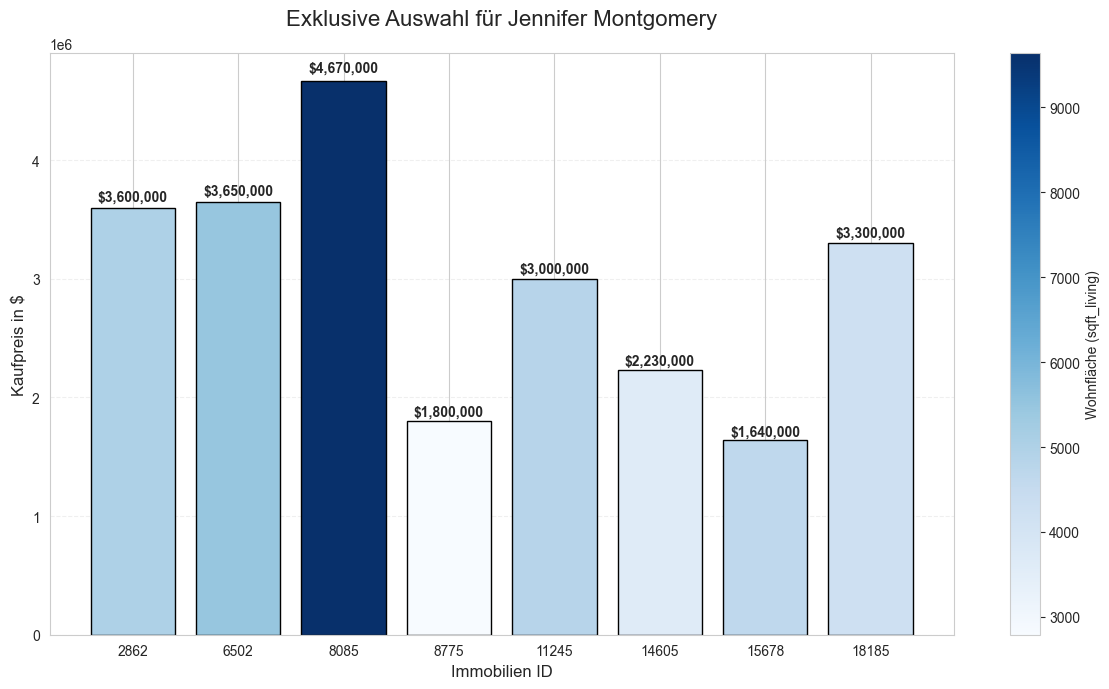

In [167]:
import matplotlib.pyplot as plt

# Prüfen, ob überhaupt Häuser in der Auswahl sind
if len(jennifers_auswahl) == 0:
    print("Keine Häuser gefunden. Jennifer muss ihre Kriterien etwas lockern!")
else:
    # 1. Figur und Achsen erstellen
    fig, ax = plt.subplots(figsize=(12, 7))

    # 2. Farbskala vorbereiten (Blau-Töne für Wohnfläche)
    norm = plt.Normalize(jennifers_auswahl['sqft_living'].min(), jennifers_auswahl['sqft_living'].max())
    sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
    colors = [plt.cm.Blues(norm(value)) for value in jennifers_auswahl['sqft_living']]

    # 3. Balkendiagramm zeichnen
    bars = ax.bar(jennifers_auswahl.index.astype(str), jennifers_auswahl['price'], 
                  color=colors, edgecolor='black')

    # 4. Preise über die Balken schreiben (für Jennifer wichtig!)
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + (yval*0.01), 
                f'${yval:,.0f}', ha='center', va='bottom', fontweight='bold')

    # 5. Achsen und Titel
    ax.set_title('Exklusive Auswahl für Jennifer Montgomery', fontsize=16, pad=20)
    ax.set_ylabel('Kaufpreis in $', fontsize=12)
    ax.set_xlabel('Immobilien ID', fontsize=12)

    # 6. Die Farblegende (Colorbar) - Jetzt SICHER eingebunden
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Wohnfläche (sqft_living)', fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [140]:
# 1. Das Verhältnis (Ratio) berechnen
# Wir teilen die eigene Wohnfläche durch die der 15 nächsten Nachbarn
jennifers_auswahl['neighborhood_ratio'] = jennifers_auswahl['sqft_living'] / jennifers_auswahl['sqft_living15']

# 2. Ein "Sicherheits-Ranking" erstellen
# Ein Wert von 1.0 ist ideal. Wir berechnen die Abweichung von 1.0.
jennifers_auswahl['safety_score'] = abs(jennifers_auswahl['neighborhood_ratio'] - 1)

# 3. Die Liste sortieren
# Häuser, die am besten zur Nachbarschaft passen (niedrigster safety_score), zuerst
jennifer_final_selection = jennifers_auswahl.sort_values(by='safety_score')

# 4. Die relevanten Spalten für Jennifer anzeigen
columns_to_show = ['price', 'sqft_living', 'sqft_living15', 'neighborhood_ratio', 'grade', 'yr_renovated']
jennifer_final_selection[columns_to_show].head(10)

,price,sqft_living,sqft_living15,neighborhood_ratio,grade,yr_renovated
18185,3300000.0,4220.0,3810.0,1.107612,11,1987
8775,1800000.0,2790.0,3140.0,0.888535,10,1989
2862,3600000.0,5020.0,3680.0,1.364130,10,2002
14605,2230000.0,3620.0,2550.0,1.419608,10,0
11245,3000000.0,4850.0,3350.0,1.447761,10,0
15678,1640000.0,4660.0,3140.0,1.484076,12,1990
6502,3650000.0,5480.0,3510.0,1.561254,11,0
8085,4670000.0,9640.0,3270.0,2.948012,12,2009


Verkäufe von Luxushäusern pro Monat:
        id   id
month          
1       49   49
2       60   60
3       94   94
4      121  121
5      146  146
6      135  135
7      120  120
8      123  123
9       82   82
10      94   94
11      79   79
12      77   77


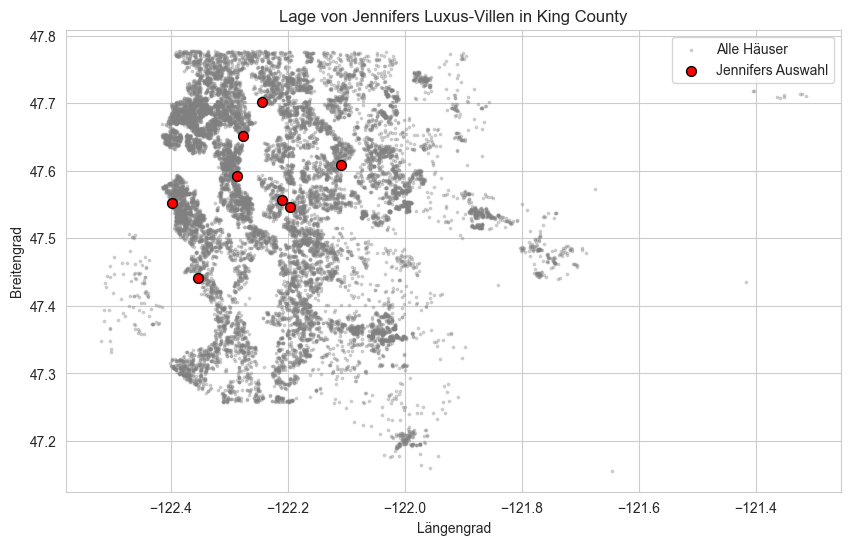

In [165]:
# Vorbereitung: Monat extrahieren
df_house_sales['month'] = pd.to_datetime(df_house_sales['date']).dt.month

# --- CHECK 1: TIMING ---
# Wie viele Luxus-Häuser werden pro Monat verkauft?
luxury_market_timing = df_house_sales[df_house_sales['grade'] >= 10].groupby('month')['id'].count()

print("Verkäufe von Luxushäusern pro Monat:")
print(luxury_market_timing)

# --- CHECK 2: LAGE (Visualisierung) ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Alle Häuser in grau im Hintergrund
plt.scatter(df_house_sales['long'], df_house_sales['lat'], c='gray', s=3, label='Alle Häuser', alpha= 0.3)
# Jennifers Top-Auswahl in rot hervorheben
plt.scatter(jennifer_final_selection['long'], jennifer_final_selection['lat'], c='red', s=50, label='Jennifers Auswahl', edgecolor='black')

plt.title('Lage von Jennifers Luxus-Villen in King County')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.legend()
plt.show()

Die 10 teuersten Postleitzahlen in King County:
zipcode
98039    2.180643e+06
98004    1.369620e+06
98040    1.187829e+06
98112    1.134293e+06
98102    9.725770e+05
98119    8.809510e+05
98105    8.656215e+05
98006    8.582130e+05
98109    8.321003e+05
98005    8.131935e+05
Name: price, dtype: float64

Jennifers Auswahl befindet sich in diesen Postleitzahlen: [98008 98006 98144 98136 98034 98166 98105 98040]


C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\476444951.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_house_sales[df_house_sales['grade'] >= 10], x='month', palette='magma')


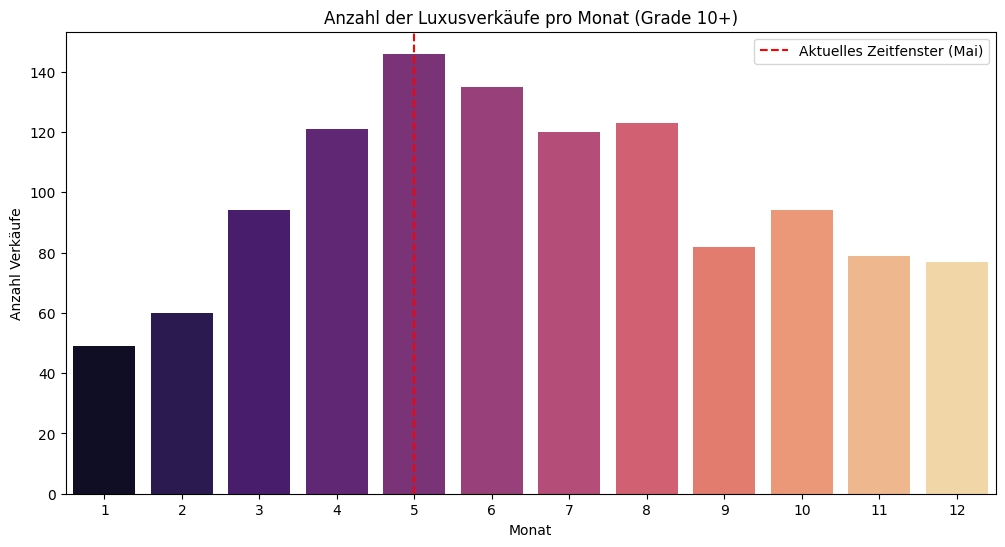

In [142]:
# 1. Die teuersten Postleitzahlen finden (Durchschnittspreis pro Zipcode)
zipcode_preise = df_house_sales.groupby('zipcode')['price'].mean().sort_values(ascending=False).head(10)

print("Die 10 teuersten Postleitzahlen in King County:")
print(zipcode_preise)

# 2. Prüfen, ob Jennifers Häuser in diesen Gebieten liegen
jennifer_zipcodes = jennifer_final_selection['zipcode'].unique()
print(f"\nJennifers Auswahl befindet sich in diesen Postleitzahlen: {jennifer_zipcodes}")

# 3. Den Seasonality-Check visualisieren (Wann ist die beste Zeit zum Kaufen/Verkaufen?)
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_house_sales[df_house_sales['grade'] >= 10], x='month', palette='magma')
plt.title('Anzahl der Luxusverkäufe pro Monat (Grade 10+)')
plt.xlabel('Monat')
plt.ylabel('Anzahl Verkäufe')
plt.axvline(x=4, color='red', linestyle='--', label='Aktuelles Zeitfenster (Mai)') # Beispiel für Mai
plt.legend()
plt.show()

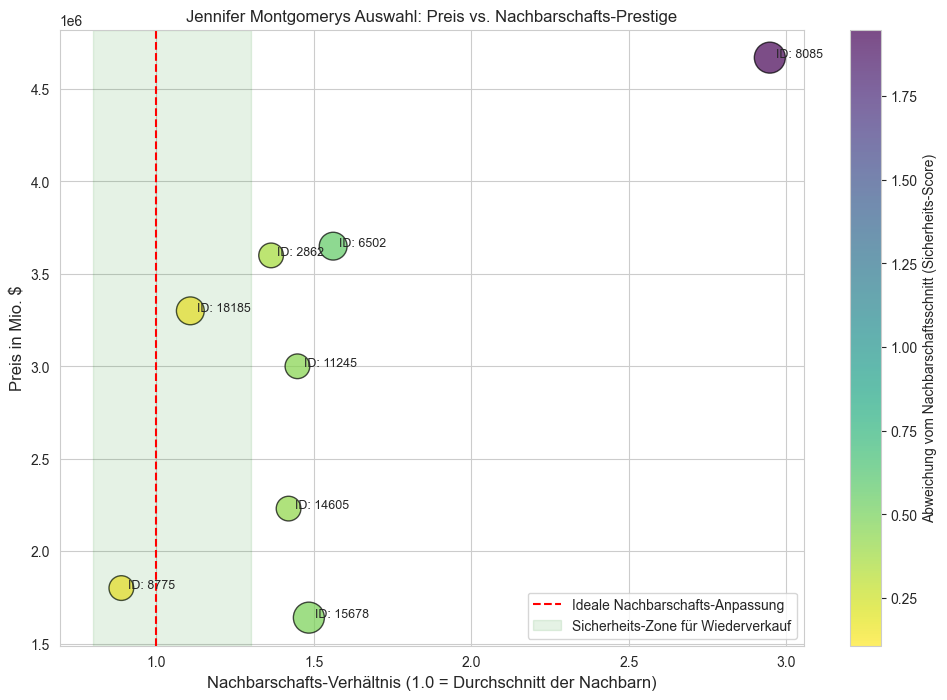

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Design-Einstellungen für den Luxus-Look
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Wir plotten Jennifers Auswahl
scatter = plt.scatter(
    jennifer_final_selection['neighborhood_ratio'], 
    jennifer_final_selection['price'], 
    s=jennifer_final_selection['grade']**2.5, # Größe der Punkte nach Grade (Luxus-Faktor)
    c=jennifer_final_selection['safety_score'], # Farbe nach Sicherheit (Dunkel = Sicherer)
    cmap='viridis_r', 
    alpha=0.7, 
    edgecolors="black"
)

# Hilfslinien für das ideale Investment (Ratio 1.0)
plt.axvline(x=1.0, color='red', linestyle='--', label='Ideale Nachbarschafts-Anpassung')
plt.axvspan(0.8, 1.3, alpha=0.1, color='green', label='Sicherheits-Zone für Wiederverkauf')

# Beschriftung der Häuser (Index)
for i in jennifer_final_selection.index:
    plt.text(
        jennifer_final_selection.loc[i, 'neighborhood_ratio'] + 0.02, 
        jennifer_final_selection.loc[i, 'price'], 
        f"ID: {i}", 
        fontsize=9
    )

plt.colorbar(scatter, label='Abweichung vom Nachbarschaftsschnitt (Sicherheits-Score)')
plt.title('Jennifer Montgomerys Auswahl: Preis vs. Nachbarschafts-Prestige', fontsize=12)
plt.xlabel('Nachbarschafts-Verhältnis (1.0 = Durchschnitt der Nachbarn)', fontsize=12)
plt.ylabel('Preis in Mio. $', fontsize=12)
plt.legend()
plt.show()

In [144]:
# 1. Daten für den Export aufbereiten
export_data = jennifer_final_selection[columns_to_show].copy()

# 2. Lesbarkeit verbessern (Runden)
export_data['neighborhood_ratio'] = export_data['neighborhood_ratio'].round(2)
export_data['price'] = export_data['price'].apply(lambda x: f"${x:,.2f}")

# 3. Als CSV speichern
export_data.to_csv('Jennifer_Montgomery_Selection.csv', index=True)

print("Die Datei 'Jennifer_Montgomery_Selection.csv' wurde erfolgreich erstellt!")

Die Datei 'Jennifer_Montgomery_Selection.csv' wurde erfolgreich erstellt!


In [194]:
# 1. Auswahl der Top 5 Häuser aus deiner sortierten Liste
jennifer_final_table = jennifer_final_selection.head(10).copy()

# 2. Jennifer-Check-Spalten hinzufügen
jennifer_final_table['Waterfront_Check'] = jennifer_final_table['waterfront'].apply(lambda x: '✅ Yes' if x == 1 else '❌ No')
jennifer_final_table['Renovated_Check'] = jennifer_final_table['yr_renovated'].apply(lambda x: '✅ Yes' if x > 0 else '⚠️ No')
jennifer_final_table['High_Grade'] = jennifer_final_table['grade'].apply(lambda x: f'✅ Grade {x}')
jennifer_final_table['Resell_Safety'] = jennifer_final_table['neighborhood_ratio'].apply(
    lambda x: '💎 High' if 0.9 <= x <= 1.2 else '⚖️ Medium'
)

# 3. Formatierung der Preise für die Tabelle
jennifer_final_table['Formatted_Price'] = jennifer_final_table['price'].apply(lambda x: f"${x:,.0f}")

# 4. Nur die Spalten anzeigen, die für Jennifer zählen
display_columns = [
    'Formatted_Price', 
    'sqft_living', 
    'Waterfront_Check', 
    'Renovated_Check', 
    'High_Grade', 
    'Resell_Safety'
]

# 5. Die Tabelle schön ausgeben
print("JENNIFER MONTGOMERY - PROPERTY SHORTLIST")
print("-" * 80)
print(jennifer_final_table[display_columns].to_string())

JENNIFER MONTGOMERY - PROPERTY SHORTLIST
--------------------------------------------------------------------------------
      Formatted_Price  sqft_living Waterfront_Check Renovated_Check  High_Grade Resell_Safety
18185      $3,300,000       4220.0            ✅ Yes           ✅ Yes  ✅ Grade 11        💎 High
8775       $1,800,000       2790.0            ✅ Yes           ✅ Yes  ✅ Grade 10     ⚖️ Medium
2862       $3,600,000       5020.0            ✅ Yes           ✅ Yes  ✅ Grade 10     ⚖️ Medium
14605      $2,230,000       3620.0            ✅ Yes           ⚠️ No  ✅ Grade 10     ⚖️ Medium
11245      $3,000,000       4850.0            ✅ Yes           ⚠️ No  ✅ Grade 10     ⚖️ Medium
15678      $1,640,000       4660.0            ✅ Yes           ✅ Yes  ✅ Grade 12     ⚖️ Medium
6502       $3,650,000       5480.0            ✅ Yes           ⚠️ No  ✅ Grade 11     ⚖️ Medium
8085       $4,670,000       9640.0            ✅ Yes           ✅ Yes  ✅ Grade 12     ⚖️ Medium


In [171]:
# 1. Schritt: Jennifers Luxus-Filter anwenden
jennifers_auswahl = df_house_sales[
    (df_house_sales['grade'] >= 10) & 
    (df_house_sales['waterfront'] == 1) & 
    (df_house_sales['view'] == 4) & 
    ((df_house_sales['yr_renovated'] > 0) | (df_house_sales['condition'] == 5))
].copy() # .copy() verhindert Warnmeldungen beim Erstellen neuer Spalten

# 2. Schritt: Investment-Analyse (Nachbarschafts-Check)
# Ratio berechnen: Eigene Fläche vs. Nachbarn
jennifers_auswahl['neighborhood_ratio'] = jennifers_auswahl['sqft_living'] / jennifers_auswahl['sqft_living15']

# Sicherheits-Score: Wie nah ist das Haus am Durchschnitt der Nachbarschaft? (1.0 = Perfekt)
jennifers_auswahl['safety_score'] = abs(jennifers_auswahl['neighborhood_ratio'] - 1)

# 3. Schritt: Finale Sortierung
# Die "sichersten" Luxus-Investments nach oben
jennifer_final_selection = jennifers_auswahl.sort_values(by='safety_score')

# 4. Schritt: Anzeige der Top 10 Ergebnisse
columns_to_show = ['price', 'sqft_living', 'sqft_living15', 'neighborhood_ratio', 'grade', 'yr_renovated', 'condition']

print(f"Anzahl der gefundenen Luxus-Häuser: {len(jennifer_final_selection)}")
jennifer_final_selection[columns_to_show].head(10)

Anzahl der gefundenen Luxus-Häuser: 8


,price,sqft_living,sqft_living15,neighborhood_ratio,grade,yr_renovated,condition
18185,3300000.0,4220.0,3810.0,1.107612,11,1987,4
8775,1800000.0,2790.0,3140.0,0.888535,10,1989,4
2862,3600000.0,5020.0,3680.0,1.364130,10,2002,3
14605,2230000.0,3620.0,2550.0,1.419608,10,0,5
11245,3000000.0,4850.0,3350.0,1.447761,10,0,5
15678,1640000.0,4660.0,3140.0,1.484076,12,1990,3
6502,3650000.0,5480.0,3510.0,1.561254,11,0,5
8085,4670000.0,9640.0,3270.0,2.948012,12,2009,3


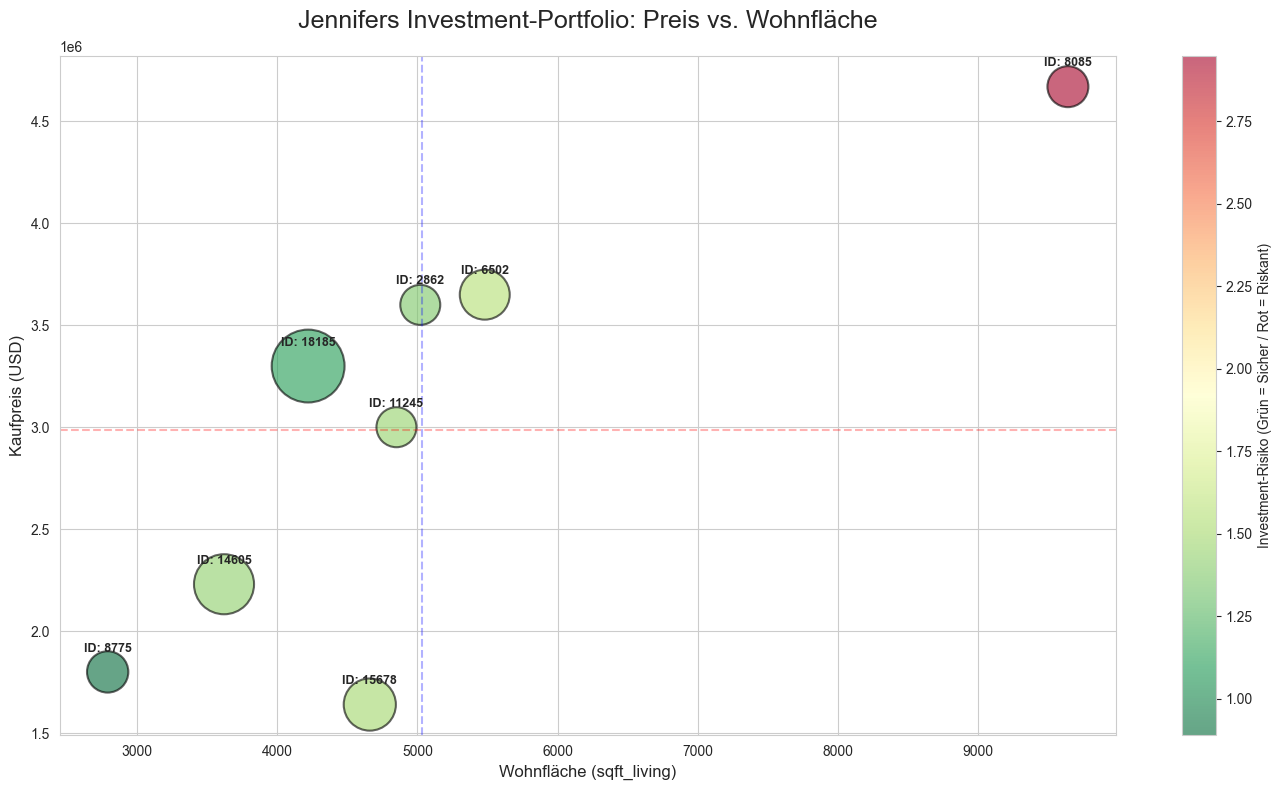

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daten vorbereiten
plot_data = jennifer_final_selection.head(15).copy()

# 2. Figur erstellen
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# 3. Das Bubble Chart (Scatter Plot)
# s = Punktgröße (Grundstücksgröße / 100 zur Skalierung)
# c = Farbe (basierend auf der neighborhood_ratio)
scatter = plt.scatter(
    x=plot_data['sqft_living'], 
    y=plot_data['price'], 
    s=plot_data['sqft_lot'] / 15,  # Skaliert die Blasen für die Optik
    c=plot_data['neighborhood_ratio'], 
    cmap='RdYlGn_r', 
    alpha=0.6, 
    edgecolors="black", 
    linewidth=1.5
)

# 4. Beschriftung der Blasen (Häuser-IDs)
for i in range(len(plot_data)):
    plt.text(
        plot_data['sqft_living'].iloc[i], 
        plot_data['price'].iloc[i] + 100000, 
        f"ID: {plot_data.index[i]}", 
        ha='center', fontsize=9, fontweight='bold'
    )

# 5. Styling & Legenden
plt.title('Jennifers Investment-Portfolio: Preis vs. Wohnfläche', fontsize=18, pad=20)
plt.xlabel('Wohnfläche (sqft_living)', fontsize=12)
plt.ylabel('Kaufpreis (USD)', fontsize=12)

# Farblegende für die Sicherheit
cbar = plt.colorbar(scatter)
cbar.set_label('Investment-Risiko (Grün = Sicher / Rot = Riskant)')

# 6. Hilfslinien zur Orientierung
plt.axvline(plot_data['sqft_living'].mean(), color='blue', linestyle='--', alpha=0.3, label='Durchschnittliche Größe')
plt.axhline(plot_data['price'].mean(), color='red', linestyle='--', alpha=0.3, label='Durchschnittlicher Preis')

plt.tight_layout()
plt.show()

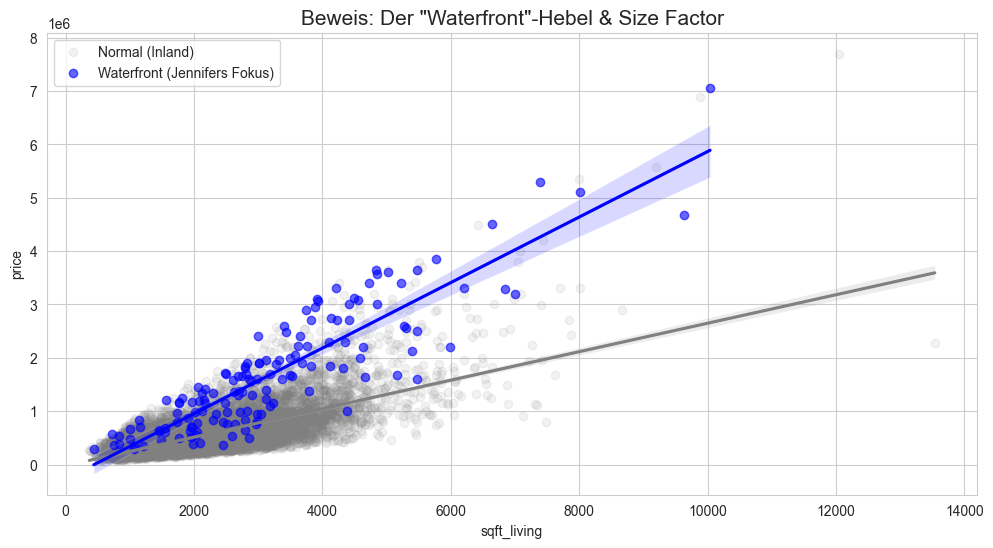

In [250]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Vergleich von Preis vs. Wohnfläche für Waterfront vs. Non-Waterfront
sns.regplot(data=df_house_sales[df_house_sales['waterfront'] == 0], x='sqft_living', y='price', 
            scatter_kws={'alpha':0.1}, label='Normal (Inland)', color='grey')
sns.regplot(data=df_house_sales[df_house_sales['waterfront'] == 1], x='sqft_living', y='price', 
            scatter_kws={'alpha':0.6}, label='Waterfront (Jennifers Fokus)', color='blue')

plt.title('Beweis: Der "Waterfront"-Hebel & Size Factor', fontsize=15)
plt.legend()
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3149143272.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=luxury_segment, x='is_renovated', y='price', palette='Set2')


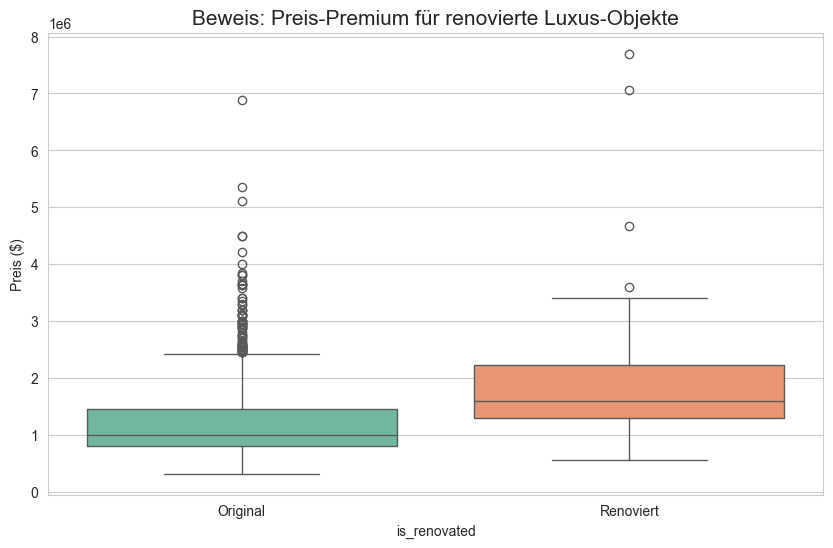

In [181]:
# Wir filtern nur Luxushäuser (Grade >= 10)
luxury_segment = df_house_sales[df_house_sales['grade'] >= 10].copy()
luxury_segment['is_renovated'] = luxury_segment['yr_renovated'].apply(lambda x: 'Renoviert' if x > 0 else 'Original')

plt.figure(figsize=(10, 6))
sns.boxplot(data=luxury_segment, x='is_renovated', y='price', palette='Set2')
plt.title('Beweis: Preis-Premium für renovierte Luxus-Objekte', fontsize=15)
plt.ylabel('Preis ($)')
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2527326494.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='is_renovated', y='price', data=luxury_segment, palette='Blues_d', ci=None)
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2527326494.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='is_renovated', y='price', data=luxury_segment, palette='Blues_d', ci=None)


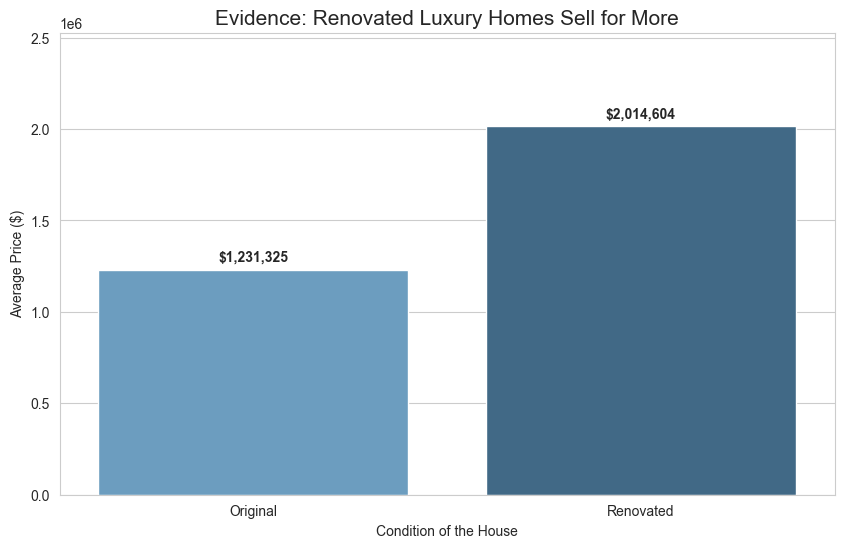

In [190]:
# 1. Sicherstellen, dass luxury_segment existiert (Grade 10 oder höher)
luxury_segment = df_house_sales[df_house_sales['grade'] >= 10].copy()

# 2. Die fehlende Spalte 'is_renovated' erstellen
# Wenn yr_renovated > 0 ist, nennen wir es 'Renovated', sonst 'Original'
luxury_segment['is_renovated'] = luxury_segment['yr_renovated'].apply(
    lambda x: 'Renovated' if x > 0 else 'Original'
)

# 3. Den Plot erstellen
plt.figure(figsize=(10, 6))
# ci=None entfernt die kleinen Fehlerbalken, das macht es für die Präsentation sauberer
ax = sns.barplot(x='is_renovated', y='price', data=luxury_segment, palette='Blues_d', ci=None)

# 4. Dollar-Beträge auf die Balken schreiben (damit Jennifer die Zahlen sofort sieht)
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points',
                fontweight='bold')

plt.title('Evidence: Renovated Luxury Homes Sell for More', fontsize=15)
plt.ylabel('Average Price ($)')
plt.xlabel('Condition of the House')
plt.ylim(0, luxury_segment['price'].mean() * 2) # Platz für die Zahlen oben lassen
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2706051162.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, ax=ax1, palette='Blues')
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2706051162.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Inland', 'Waterfront'])
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2706051162.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Renoviert', y='price', data=luxury, ax=ax2, palette='Greens')


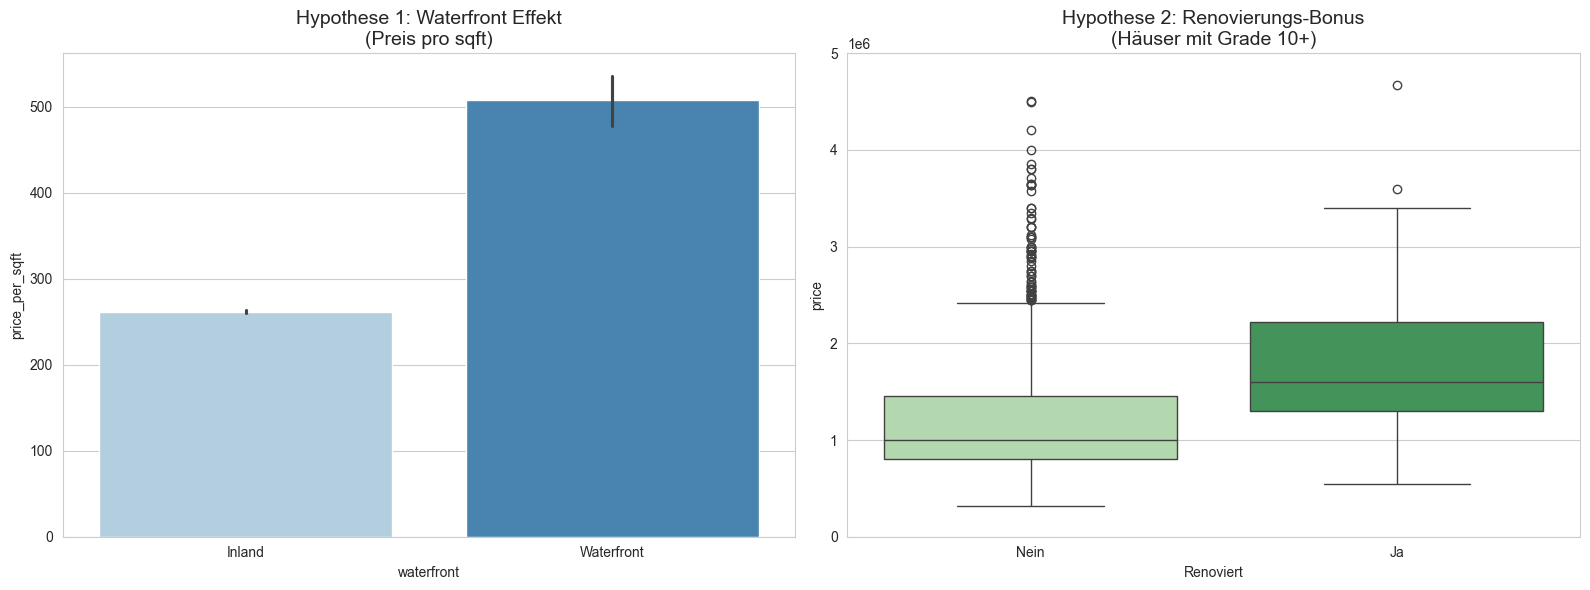

In [183]:
# Vorbereitung: Preis pro Quadratfuß berechnen
df_house_sales['price_per_sqft'] = df_house_sales['price'] / df_house_sales['sqft_living']

# Grafik-Setup
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# BEWEIS 1: Waterfront Goldmine
sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, ax=ax1, palette='Blues')
ax1.set_title('Hypothese 1: Waterfront Effekt\n(Preis pro sqft)', fontsize=14)
ax1.set_xticklabels(['Inland', 'Waterfront'])

# BEWEIS 2: Renovation Premium (nur Luxus-Grades)
luxury = df_house_sales[df_house_sales['grade'] >= 10].copy()
luxury['Renoviert'] = luxury['yr_renovated'].apply(lambda x: 'Ja' if x > 0 else 'Nein')

sns.boxplot(x='Renoviert', y='price', data=luxury, ax=ax2, palette='Greens')
ax2.set_title('Hypothese 2: Renovierungs-Bonus\n(Häuser mit Grade 10+)', fontsize=14)
ax2.set_ylim(0, 5000000) # Fokus auf relevanten Preisbereich

plt.tight_layout()
plt.show()

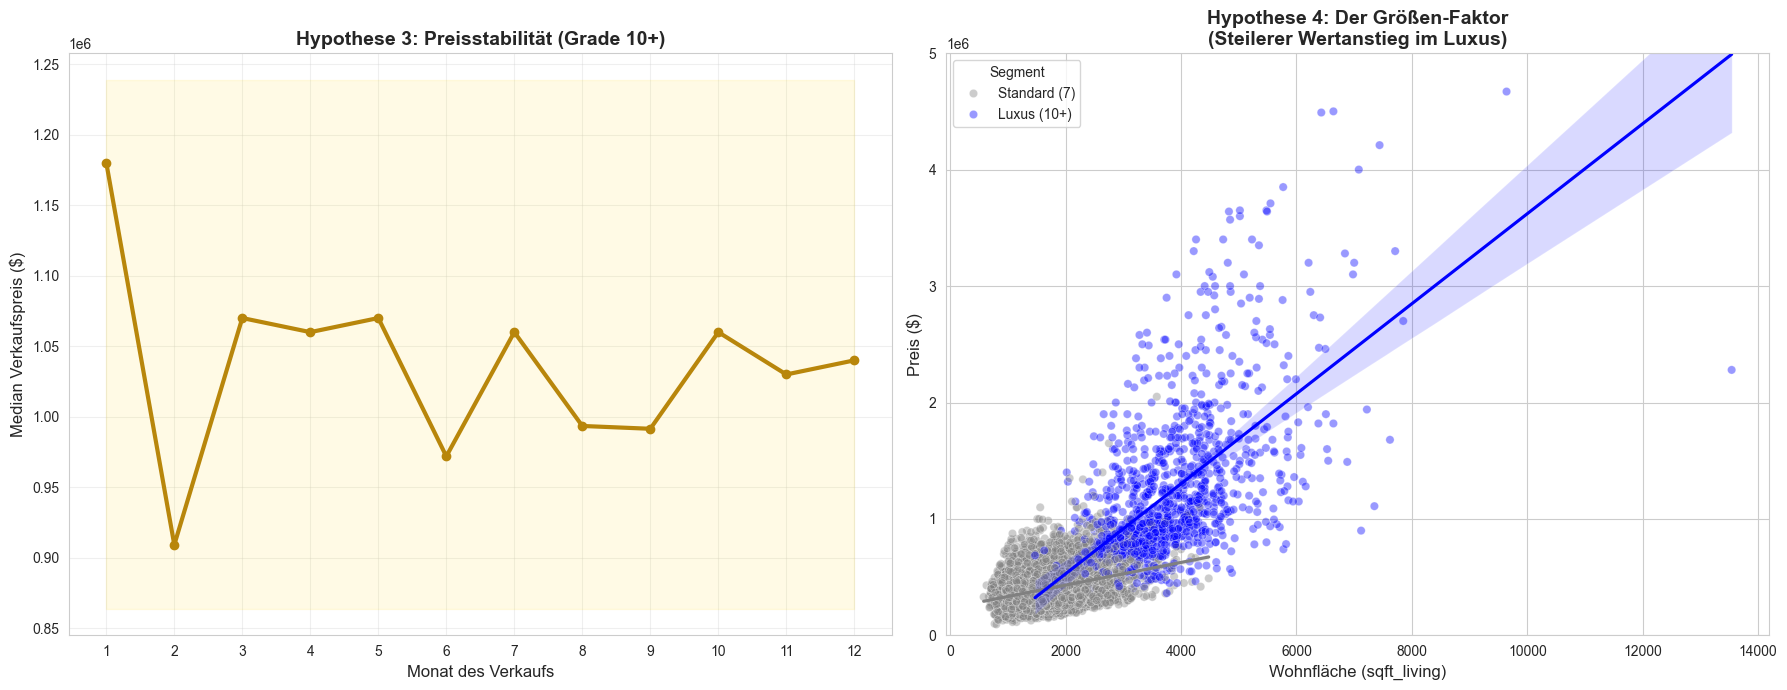

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Vorbereitung: Monat extrahieren für Zeit-Analyse
df_house_sales['month'] = pd.to_datetime(df_house_sales['date']).dt.month

# Zwei Grafiken nebeneinander
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# --- BEWEIS 3: Stable Investment (Preisverlauf über das Jahr) ---
# Wir schauen uns den Median-Preis für Luxushäuser (Grade >= 10) pro Monat an
luxury_trend = df_house_sales[df_house_sales['grade'] >= 10].groupby('month')['price'].median()

ax1.plot(luxury_trend.index, luxury_trend.values, marker='o', linestyle='-', linewidth=3, color='#B8860B')
ax1.set_title('Hypothese 3: Preisstabilität (Grade 10+)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Monat des Verkaufs', fontsize=12)
ax1.set_ylabel('Median Verkaufspreis ($)', fontsize=12)
ax1.set_xticks(range(1, 13))
ax1.grid(True, alpha=0.3)
# Markierung für Jennifers 12-Monate-Plan
ax1.fill_between(luxury_trend.index, luxury_trend.values.min()*0.95, luxury_trend.values.max()*1.05, color='gold', alpha=0.1, label='Stabilitäts-Zone')

# --- BEWEIS 4: Size Factor (Bigger is better in Luxury) ---
# Wir vergleichen Luxus (Grade >=10) mit dem Durchschnitt (Grade 7)
comparison_data = df_house_sales[df_house_sales['grade'].isin([7, 10, 11, 12])]
comparison_data['Segment'] = comparison_data['grade'].apply(lambda x: 'Luxus (10+)' if x >= 10 else 'Standard (7)')

sns.scatterplot(data=comparison_data, x='sqft_living', y='price', hue='Segment', alpha=0.4, ax=ax2, palette=['grey', 'blue'])
sns.regplot(data=comparison_data[comparison_data['Segment'] == 'Standard (7)'], x='sqft_living', y='price', scatter=False, ax=ax2, color='grey')
sns.regplot(data=comparison_data[comparison_data['Segment'] == 'Luxus (10+)'], x='sqft_living', y='price', scatter=False, ax=ax2, color='blue')

ax2.set_title('Hypothese 4: Der Größen-Faktor\n(Steilerer Wertanstieg im Luxus)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Wohnfläche (sqft_living)', fontsize=12)
ax2.set_ylabel('Preis ($)', fontsize=12)
ax2.set_ylim(0, 5000000)

plt.tight_layout()
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2291597274.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, ax=axes[0], palette='Blues_d', edgecolor='black')
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2291597274.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Inland', 'Waterfront'])
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2291597274.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y='price', data=luxury_segment, ax=axes[1], palette='Greens', width=0.6)


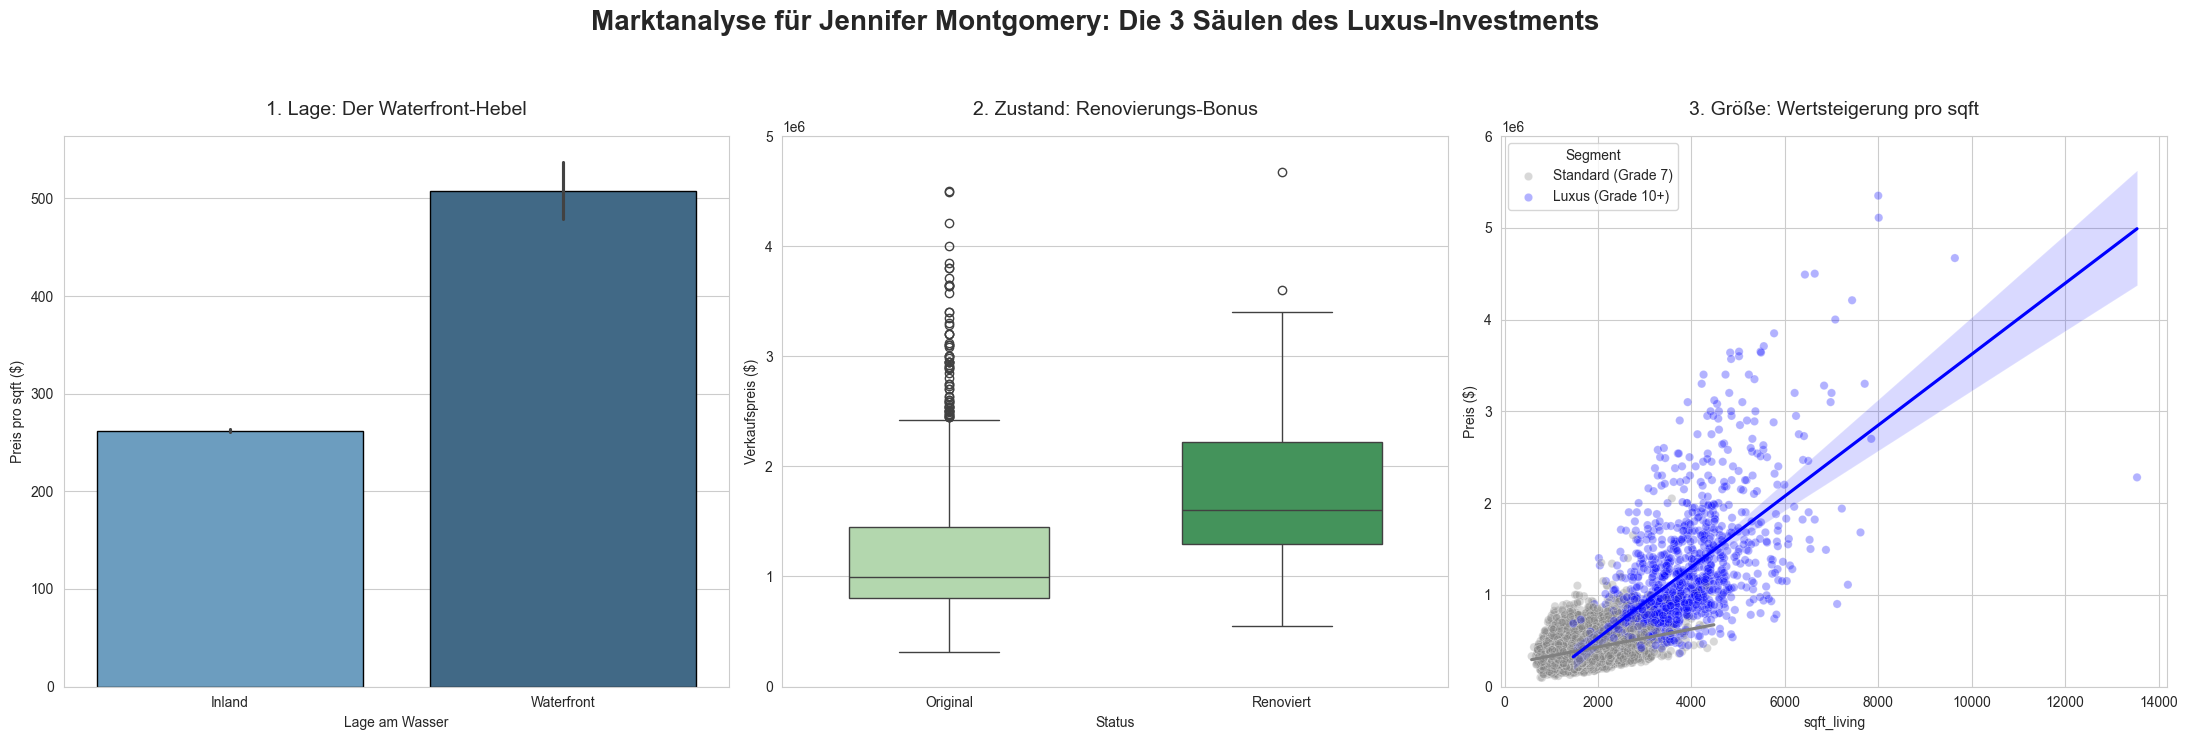

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vorbereitung: Preis pro Quadratfuß berechnen
df_house_sales['price_per_sqft'] = df_house_sales['price'] / df_house_sales['sqft_living']

# Erstellung des Dashboards (3 Grafiken nebeneinander)
fig, axes = plt.subplots(1, 3, figsize=(22, 7), facecolor='white')
fig.suptitle('Marktanalyse für Jennifer Montgomery: Die 3 Säulen des Luxus-Investments', fontsize=20, fontweight='bold', y=1.05)

# --- 1. WATERFRONT EFFEKT ---
sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, ax=axes[0], palette='Blues_d', edgecolor='black')
axes[0].set_title('1. Lage: Der Waterfront-Hebel', fontsize=14, pad=15)
axes[0].set_xticklabels(['Inland', 'Waterfront'])
axes[0].set_ylabel('Preis pro sqft ($)')
axes[0].set_xlabel('Lage am Wasser')

# --- 2. RENOVATION PREMIUM ---
# Wir filtern für diesen Vergleich nur Luxus-Grades (10-12)
luxury_segment = df_house_sales[df_house_sales['grade'] >= 10].copy()
luxury_segment['Status'] = luxury_segment['yr_renovated'].apply(lambda x: 'Renoviert' if x > 0 else 'Original')

sns.boxplot(x='Status', y='price', data=luxury_segment, ax=axes[1], palette='Greens', width=0.6)
axes[1].set_title('2. Zustand: Renovierungs-Bonus', fontsize=14, pad=15)
axes[1].set_ylabel('Verkaufspreis ($)')
axes[1].set_ylim(0, 5000000) # Fokus auf den Kernbereich bis 5 Mio.

# --- 3. SIZE FACTOR ---
# Vergleich von Luxus vs. Standard
comp_data = df_house_sales[df_house_sales['grade'].isin([7, 10, 11, 12])].copy()
comp_data['Segment'] = comp_data['grade'].apply(lambda x: 'Luxus (Grade 10+)' if x >= 10 else 'Standard (Grade 7)')

sns.scatterplot(data=comp_data, x='sqft_living', y='price', hue='Segment', alpha=0.3, ax=axes[2], palette=['grey', 'blue'])
sns.regplot(data=comp_data[comp_data['Segment'] == 'Standard (Grade 7)'], x='sqft_living', y='price', scatter=False, ax=axes[2], color='grey')
sns.regplot(data=comp_data[comp_data['Segment'] == 'Luxus (Grade 10+)'], x='sqft_living', y='price', scatter=False, ax=axes[2], color='blue')
axes[2].set_title('3. Größe: Wertsteigerung pro sqft', fontsize=14, pad=15)
axes[2].set_ylabel('Preis ($)')
axes[2].set_ylim(0, 6000000)

# Layout optimieren
plt.tight_layout()
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3228418906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=water_avg.index, y=water_avg.values, ax=ax1, palette='Blues_r')
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3228418906.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(['Inland', 'Waterfront'])
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3228418906.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reno_avg.index, y=reno_avg.values, ax=ax2, palette='Greens_r')
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3228418906.py:33: FutureWarning: 

Passing `p

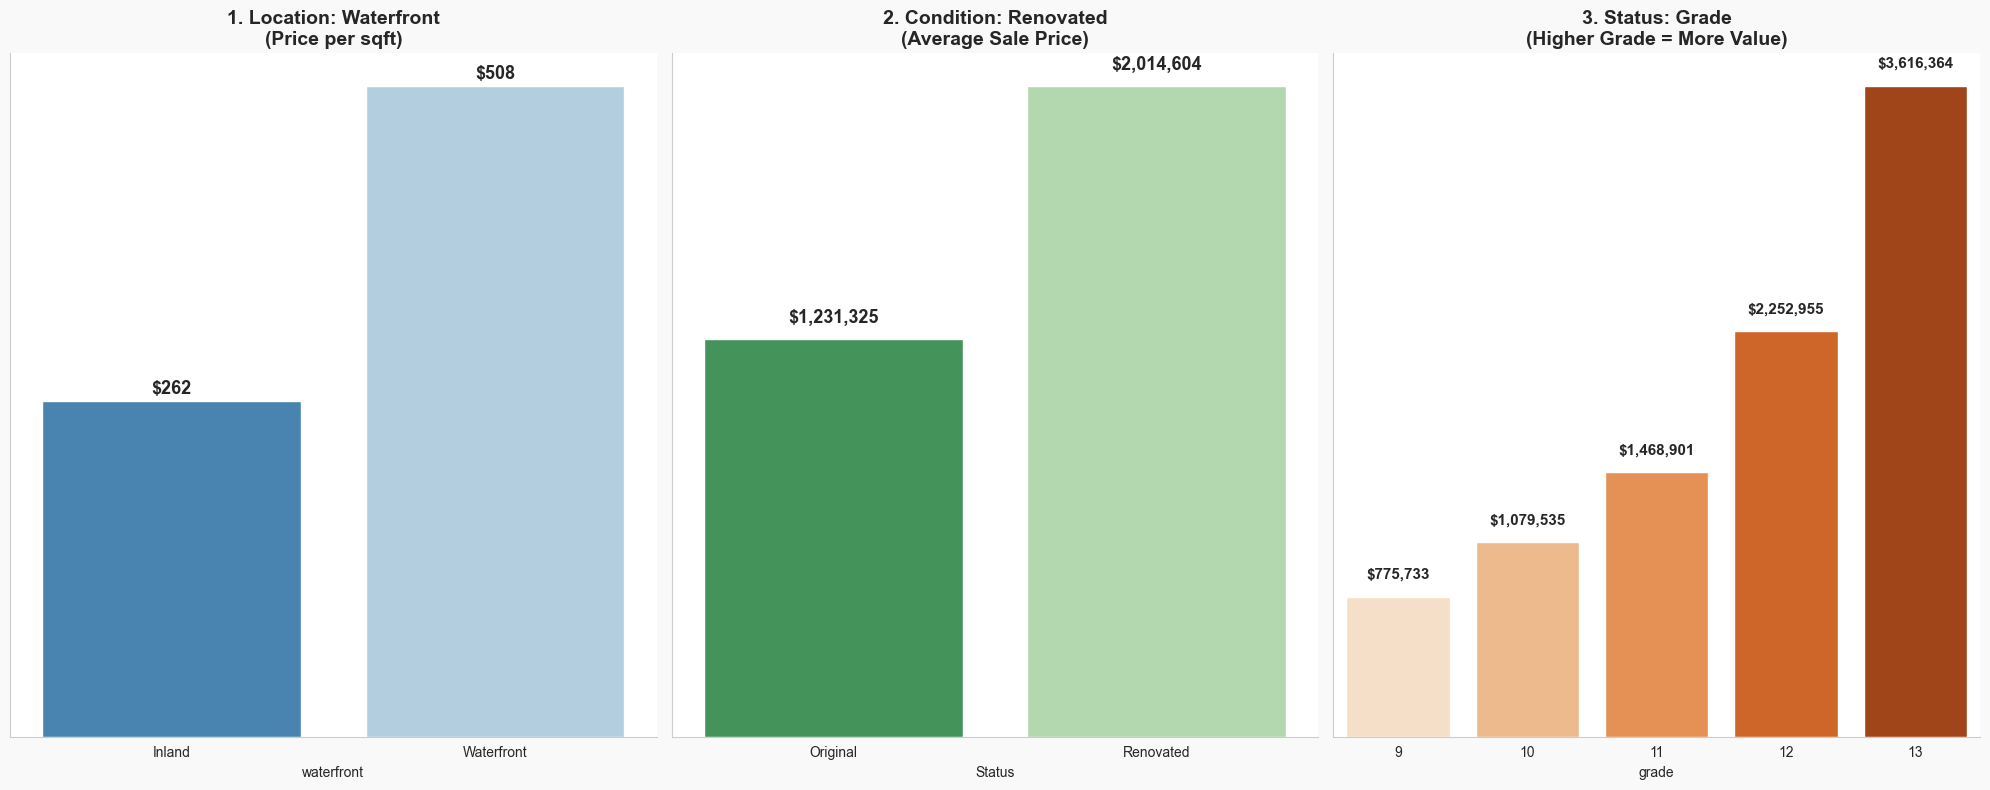

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vorbereitung der Daten
# 1. Waterfront Check
water_avg = df_house_sales.groupby('waterfront')['price_per_sqft'].mean()

# 2. Renovation Check (Nur Luxus-Häuser Grade 10+)
luxury = df_house_sales[df_house_sales['grade'] >= 10].copy()
luxury['Status'] = luxury['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Original')
reno_avg = luxury.groupby('Status')['price'].mean()

# 3. Size Factor (Preis pro Grade)
size_avg = df_house_sales.groupby('grade')['price'].mean().tail(5) # Top 5 Grades

# Dashboard erstellen
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8), facecolor='#F9F9F9')

# --- PLOT 1: WATERFRONT ---
sns.barplot(x=water_avg.index, y=water_avg.values, ax=ax1, palette='Blues_r')
ax1.set_title('1. Location: Waterfront\n(Price per sqft)', fontsize=14, fontweight='bold')
ax1.set_xticklabels(['Inland', 'Waterfront'])
for i, v in enumerate(water_avg.values):
    ax1.text(i, v + 5, f'${v:.0f}', ha='center', fontweight='bold', fontsize=13)

# --- PLOT 2: RENOVATION ---
sns.barplot(x=reno_avg.index, y=reno_avg.values, ax=ax2, palette='Greens_r')
ax2.set_title('2. Condition: Renovated\n(Average Sale Price)', fontsize=14, fontweight='bold')
for i, v in enumerate(reno_avg.values):
    ax2.text(i, v + 50000, f'${v:,.0f}', ha='center', fontweight='bold', fontsize=13)

# --- PLOT 3: SIZE/GRADE ---
sns.barplot(x=size_avg.index, y=size_avg.values, ax=ax3, palette='Oranges')
ax3.set_title('3. Status: Grade\n(Higher Grade = More Value)', fontsize=14, fontweight='bold')
for i, v in enumerate(size_avg.values):
    ax3.text(i, v + 100000, f'${v:,.0f}', ha='center', fontweight='bold', fontsize=11)

# Design-Schliff
for ax in [ax1, ax2, ax3]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('')
    ax.set_yticks([]) # Wir brauchen keine Y-Achse, weil die Zahlen über den Balken stehen!

plt.tight_layout()
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2008814293.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, palette=['gray', 'royalblue'], ci=None)
C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\2008814293.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, palette=['gray', 'royalblue'], ci=None)


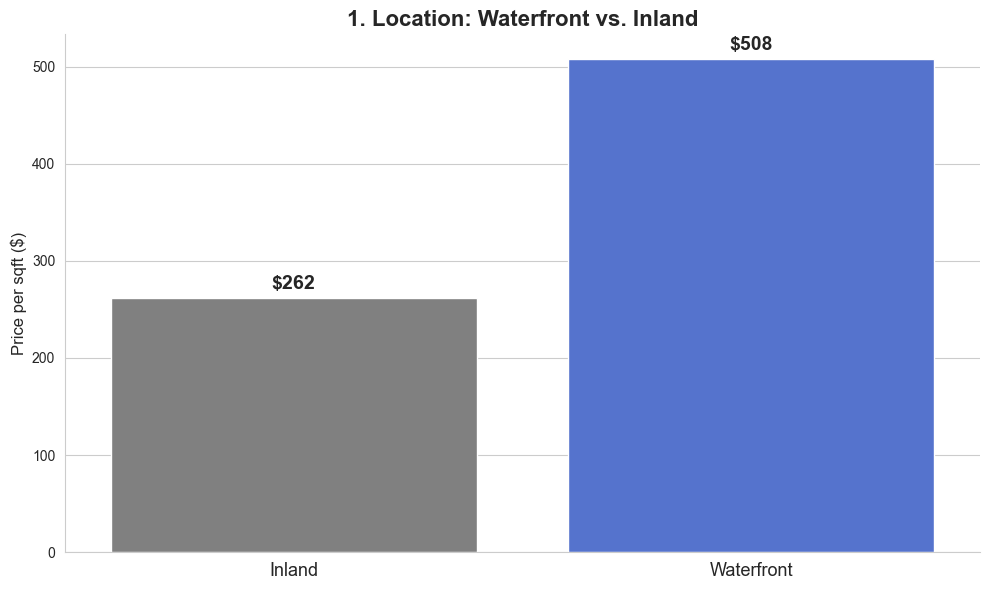

In [204]:
plt.figure(figsize=(10, 6))

# Durchschnittswerte berechnen für die Labels
waterfront_stats = df_house_sales.groupby('waterfront')['price_per_sqft'].mean()

ax = sns.barplot(x='waterfront', y='price_per_sqft', data=df_house_sales, palette=['gray', 'royalblue'], ci=None)

# Zahlen über die Balken schreiben
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=14, fontweight='bold')

plt.title('1. Location: Waterfront vs. Inland', fontsize=16, fontweight='bold')
plt.ylabel('Price per sqft ($)', fontsize=12)
plt.xlabel('')
plt.xticks([0, 1], ['Inland', 'Waterfront'], fontsize=13)
sns.despine() # Entfernt den Rahmen oben und rechts
plt.tight_layout()
plt.show()

C:\Users\srmat\AppData\Local\Temp\ipykernel_37044\3850125694.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reno_avg.index, y=reno_avg.values, ax=ax, palette=['#f5f5dc', '#2c3e50'])


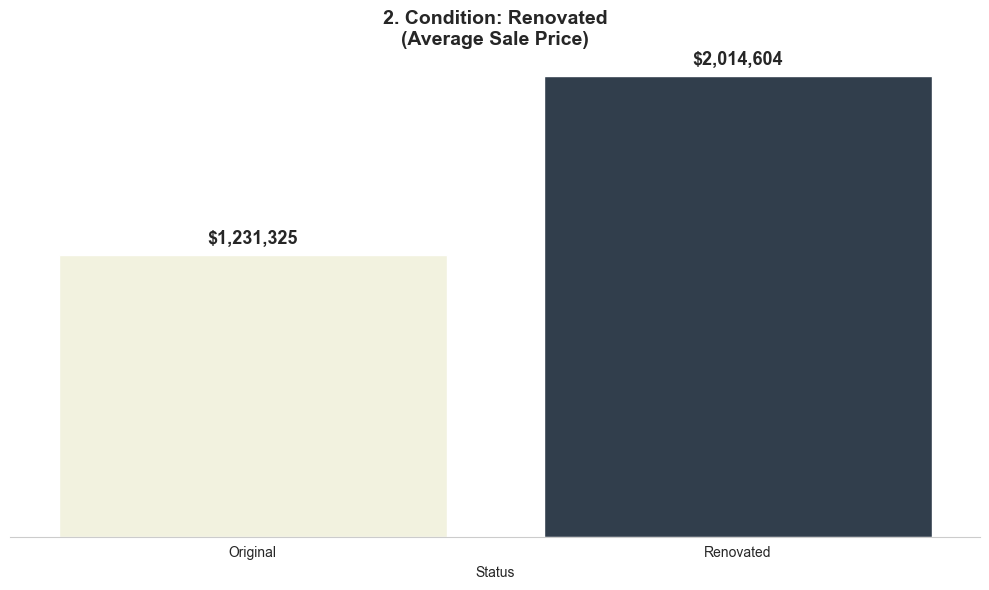

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Daten vorbereiten (Nur Luxus-Häuser Grade 10+)
luxury = df_house_sales[df_house_sales['grade'] >= 10].copy()
luxury['Status'] = luxury['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Original')
reno_avg = luxury.groupby('Status')['price'].mean()

# 2. Das Fenster (Figure) und die Achse (ax) erstellen
# Wir erstellen hier nur 1 Plot (ax), weil dein Code sich auf die Renovierung bezieht
fig, ax = plt.subplots(figsize=(10, 6))

# 3. Den Balken-Plot zeichnen
# Wichtig: Wir nutzen ax=ax, damit Python weiß, wo der Plot hin soll
sns.barplot(x=reno_avg.index, y=reno_avg.values, ax=ax, palette=['#f5f5dc', '#2c3e50'])

# 4. Titel und Zahlen über die Balken schreiben
ax.set_title('2. Condition: Renovated\n(Average Sale Price)', fontsize=14, fontweight='bold')

for i, v in enumerate(reno_avg.values):
    ax.text(i, v + 50000, f'${v:,.0f}', ha='center', fontweight='bold', fontsize=13)

# 5. Design-Schliff (Spines entfernen und Y-Achse ausblenden)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) # Auch links weg für cleanen Look
ax.set_ylabel('')
ax.set_yticks([]) # Y-Achse weg, da Zahlen über den Balken stehen

plt.tight_layout()
plt.show()

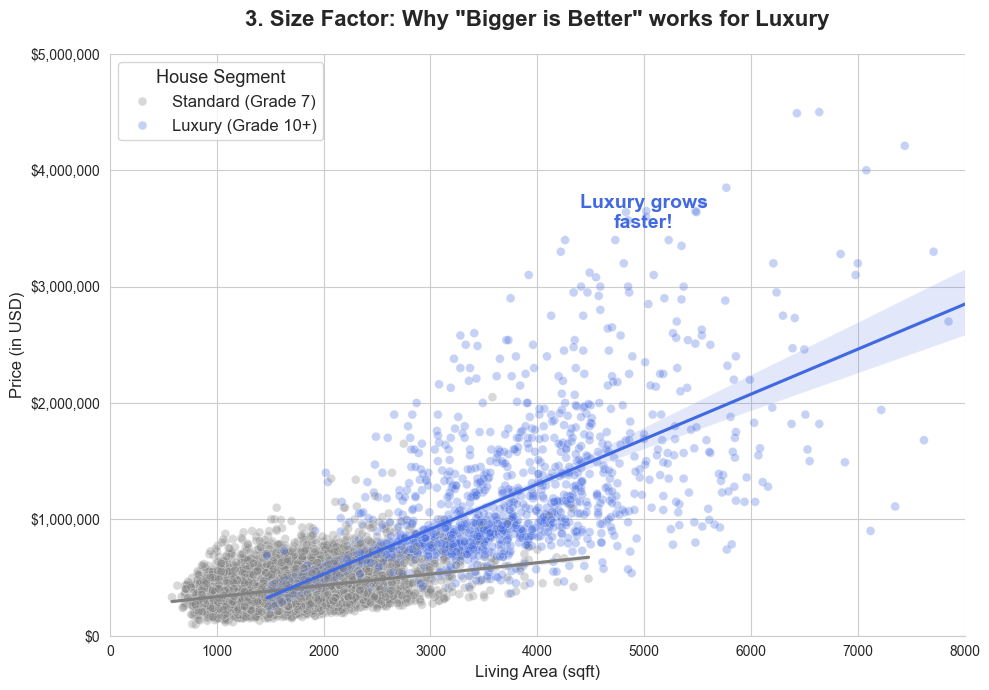

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# 1. Daten vorbereiten
# Wir vergleichen Grade 7 (Standard) mit den hohen Grades (10, 11, 12 für Luxus)
comp_data = df_house_sales[df_house_sales['grade'].isin([7, 10, 11, 12])].copy()
comp_data['Segment'] = comp_data['grade'].apply(lambda x: 'Luxury (Grade 10+)' if x >= 10 else 'Standard (Grade 7)')

# 2. Den Plot erstellen
plt.figure(figsize=(10, 7))

# Scatterplot: Die Punkte im Hintergrund
sns.scatterplot(data=comp_data, x='sqft_living', y='price', hue='Segment', 
                alpha=0.3, palette=['grey', 'royalblue'], s=40)

# Regplot: Die zwei Linien, die den Trend zeigen (Steigung)
sns.regplot(data=comp_data[comp_data['Segment'] == 'Standard (Grade 7)'], 
            x='sqft_living', y='price', scatter=False, color='grey', label='_nolegend_')

sns.regplot(data=comp_data[comp_data['Segment'] == 'Luxury (Grade 10+)'], 
            x='sqft_living', y='price', scatter=False, color='royalblue', label='_nolegend_')

# 3. Fenster anpassen (Zoom)
plt.xlim(0, 8000) # Fokus auf Häuser bis 8000 sqft
plt.ylim(0, 5000000) # Fokus auf Preis bis 5 Mio.

# 4. Beschriftung (PowerPoint-Style)
plt.title('3. Size Factor: Why "Bigger is Better" works for Luxury', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Living Area (sqft)', fontsize=12)
plt.ylabel('Price (in USD)', fontsize=12)

# Preis schöner formatieren ($1M, $2M...)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Legende hübsch machen
plt.legend(title='House Segment', fontsize=12, title_fontsize=13)

# 5. Ein kleiner Hinweis-Text direkt im Bild
plt.text(5000, 3500000, "Luxury grows\nfaster!", fontsize=14, color='royalblue', fontweight='bold', ha='center')

sns.despine()
plt.tight_layout()
plt.show()